In [1]:
%load_ext sql

In [3]:
%sql postgresql://postgres@psql:5432/postgres

'Connected: postgres@postgres'

In [4]:
%sql SELECT * FROM Life LIMIT 10;

10 rows affected.


location,subject,time,value
1,7,1960,67.9
1,7,1961,68.0
1,7,1962,67.8
1,7,1963,67.9
1,7,1964,67.5
1,7,1965,67.7
1,7,1966,67.6
1,7,1967,67.8
1,7,1968,67.5
1,7,1969,67.5


In [127]:
%sql SELECT * FROM GDP LIMIT 10;

10 rows affected.


location,subject,meassure_type,time,value
1,6,MLN_USD,1960,25029.0336
1,6,MLN_USD,1961,25320.6787
1,6,MLN_USD,1962,27905.9382
1,6,MLN_USD,1963,30378.5632
1,6,MLN_USD,1964,32687.4079
1,6,MLN_USD,1965,34481.4258
1,6,MLN_USD,1966,38275.4368
1,6,MLN_USD,1967,40994.175
1,6,MLN_USD,1968,46477.0639
1,6,MLN_USD,1969,52119.205


In [129]:
%%sql 
DROP VIEW max CASCADE;
CREATE VIEW max as 
SELECT location, MAX(time) as time FROM GDP GROUP BY location

Done.
Done.


[]

In [130]:
%%sql 
DROP VIEW min CASCADE;
CREATE VIEW min as 
SELECT location, MIN(time) as time FROM GDP GROUP BY location

Done.
Done.


[]

In [140]:
%%sql 
DROP VIEW maxexp CASCADE;
CREATE VIEW maxexp as
SELECT location, AVG(value) from max JOIN GDP USING(location, time) GROUP BY location ORDER BY location ASC

Done.
Done.


[]

In [141]:
%%sql 
DROP VIEW minexp CASCADE;
CREATE VIEW minexp as
SELECT location, AVG(value) from min JOIN GDP USING(location, time) GROUP BY location ORDER BY location ASC

Done.
Done.


[]

In [144]:
%%sql 
DROP VIEW growth CASCADE;
CREATE VIEW growth as
SELECT location, (maxexp.avg-minexp.avg)/minexp.avg*100 as gro FROM minexp JOIN maxexp USING (location) ORDER BY gro ASC

Done.
Done.


[]

In [145]:
%%sql
SELECT growth.location, locations.countrycode, growth.gro 
FROM growth 
JOIN locations ON locations.id=growth.location
WHERE gro=(SELECT MAX(gro) FROM growth) 

1 rows affected.


location,countrycode,gro
28,KOR,9873.41742757829


In [146]:
%%sql
SELECT growth.location, locations.countrycode, growth.gro 
FROM growth 
JOIN locations ON locations.id=growth.location
WHERE gro=(SELECT MIN(gro) FROM growth) 

1 rows affected.


location,countrycode,gro
4,BRA,23.0186781335712


In [204]:
%%sql
SELECT location, MAX(time) as time FROM Life WHERE location=28 GROUP BY location

1 rows affected.


location,time
28,2015


In [188]:
%%sql 
DROP VIEW bralife;
CREATE VIEW bralife as
SELECT location, time, AVG(value) as value FROM Life 
WHERE Life.location=4
GROUP BY time, location
ORDER BY time ASC


Done.
Done.


[]

In [194]:
%%sql 
CREATE VIEW brasilian as
SELECT Education.location, Education.time, AVG(Education.value) as eduscore, AVG(bralife.value) as lifeexp FROM Education
JOIN bralife USING(time)
WHERE Education.location=4
GROUP BY Education.time, Education.location
ORDER BY Education.time ASC

Done.


[]

In [196]:
%sql SELECT * FROM brasilian;

8 rows affected.


location,time,eduscore,lifeexp
4,2007,23.83258182,72.4666666666667
4,2008,24.29341292,72.7666666666667
4,2009,24.32397804,73.0666666666667
4,2011,24.6206972,73.6
4,2012,25.1660944,73.8666666666667
4,2013,25.4640932,74.1666666666667
4,2014,25.6887944,74.4666666666667
4,2015,25.8787774,74.7333333333333


In [197]:
import matplotlib.pyplot as plt

In [198]:
result = %sql SELECT eduscore, lifeexp FROM brasilian

8 rows affected.


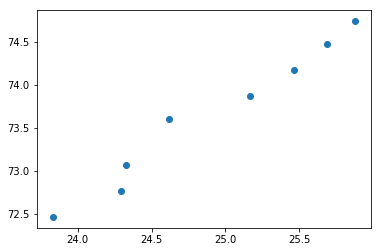

In [199]:
list1, list2 = zip(*result)
plt.scatter(list1,list2)
plt.show()

In [200]:
%%sql 
CREATE VIEW korea as
SELECT Education.location, Education.time, AVG(Education.value) as eduscore, AVG(bralife.value) as lifeexp FROM Education
JOIN bralife USING(time)
WHERE Education.location=28
GROUP BY Education.time, Education.location
ORDER BY Education.time ASC

Done.


[]

In [201]:
result = %sql SELECT eduscore, lifeexp FROM korea

20 rows affected.


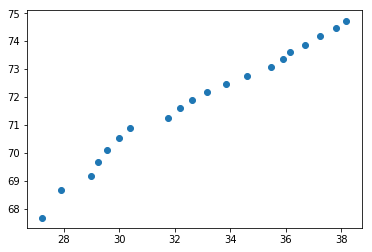

In [202]:
list1, list2 = zip(*result)
plt.scatter(list1,list2)
plt.show()